<a href="https://colab.research.google.com/github/jeffersoncdantas/ciencia_de_dados/blob/main/algoritmo_de_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Jefferson da Conceição Dantas | RA 10401327
Marina Miki Sinzato | RA 10401880
'''

'\nJefferson da Conceição Dantas | RA 10401327\nMarina Miki Sinzato | RA 10401880\n'

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_excel
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

**<h1>DataFrame</h1>**

In [ ]:
df_pizzas = read_excel('pizzas_orders.xlsx')

In [ ]:
display(df_pizzas.head())

,order_id,date,time,day_week,pizza,quantity,size,price,category
0,1,2015-01-01,11:38:36,Thursday,The Hawaiian Pizza,1,M,13.25,Classic
1,2,2015-01-01,11:57:40,Thursday,The Classic Deluxe Pizza,1,M,16.00,Classic
2,2,2015-01-01,11:57:40,Thursday,The Five Cheese Pizza,1,L,18.50,Veggie
3,2,2015-01-01,11:57:40,Thursday,The Italian Supreme Pizza,1,L,20.75,Supreme
4,2,2015-01-01,11:57:40,Thursday,The Mexicana Pizza,1,M,16.00,Veggie


In [ ]:
df = pd.DataFrame()

label_encoder = LabelEncoder()

df['dia_da_semana'] = label_encoder.fit_transform(df_pizzas['day_week'])
df['tamanho'] = label_encoder.fit_transform(df_pizzas['size'])
df['categoria'] = label_encoder.fit_transform(df_pizzas['category'])
df['preço'] = df_pizzas['price']
df['hora_do_pedido'] = df_pizzas['time']
df['quantidade'] = df_pizzas['quantity']

In [ ]:
display(df.dtypes)

,0
dia_da_semana,int64
tamanho,int64
categoria,int64
preço,float64
hora_do_pedido,object
quantidade,int64


In [ ]:
X = df[['dia_da_semana', 'quantidade', 'tamanho', 'preço']]
y = df['categoria']

In [ ]:
display(X.head())

,dia_da_semana,quantidade,tamanho,preço
0,4,1,1,13.25
1,4,1,1,16.00
2,4,1,0,18.50
3,4,1,0,20.75
4,4,1,1,16.00


In [ ]:
display(y.head())

,categoria
0,1
1,1
2,3
3,2
4,3


**<h1>K-Pastas</h1>**

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
display(kf)

KFold(n_splits=5, random_state=42, shuffle=True)

**<h1>Cross Validation - Decision Tree</h1>**

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy')

tree_scores = cross_val_score(decision_tree_model, X, y, cv=kf, scoring='accuracy')

print(f'Acurácia média (Árvore de Decisão): {tree_scores.mean()}')

Acurácia média (Árvore de Decisão): 0.7858083093377212


In [ ]:
y_true = []
y_pred_tree_all = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    decision_tree_model.fit(X_train, y_train)

    y_pred_tree = decision_tree_model.predict(X_test)

    y_true.extend(y_test)
    y_pred_tree_all.extend(y_pred_tree)

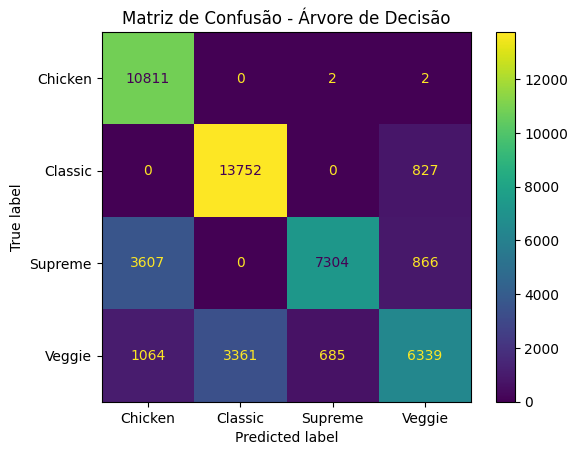

In [ ]:
cm_tree = confusion_matrix(y_true, y_pred_tree_all)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=label_encoder.classes_)
disp_tree.plot()
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

**<h1>Cross Validation - KNN</h1>**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_scores = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')

print(f'Acurácia média (KNN): {knn_scores.mean()}')

Acurácia média (KNN): 0.7602426984779924


In [ ]:
#Grid Search para KNN
param_grid = {'n_neighbors': np.arange(1, 5)}

knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kf)
knn_gscv.fit(X, y)

print(f'Melhor valor de n_neighbors: {knn_gscv.best_params_}')
print(f'Melhor acurácia: {knn_gscv.best_score_}')

Melhor valor de n_neighbors: {'n_neighbors': 4}
Melhor acurácia: 0.767338543809132


In [ ]:
y_true_knn = []
y_pred_knn_all = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    y_true_knn.extend(y_test)
    y_pred_knn_all.extend(y_pred_knn)

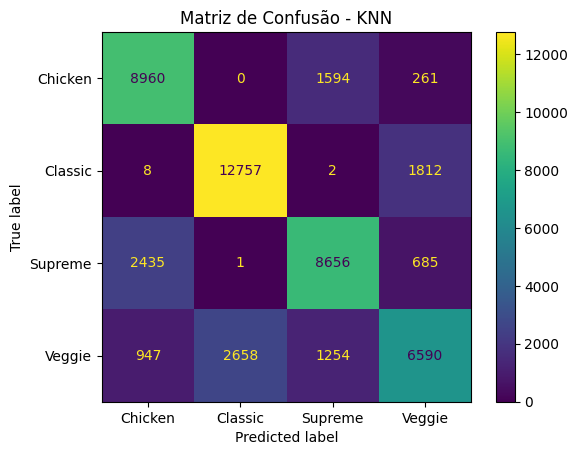

In [ ]:
cm_knn = confusion_matrix(y_true_knn, y_pred_knn_all)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=label_encoder.classes_)
disp_knn.plot()
plt.title("Matriz de Confusão - KNN")
plt.show()